In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
import xgboost as xgb 

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [12]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [13]:
import tensorflow as tf

In [14]:
from tensorflow import keras

In [15]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")


In [16]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [17]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [18]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [20]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

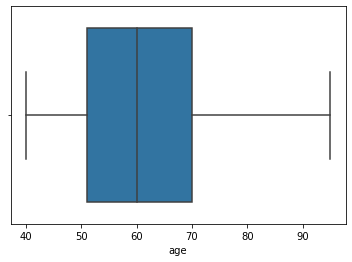

In [21]:
sns.boxplot(df['age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='anaemia'>

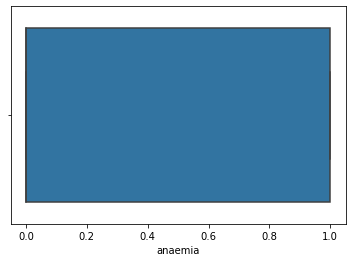

In [22]:
sns.boxplot(df['anaemia'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='creatinine_phosphokinase'>

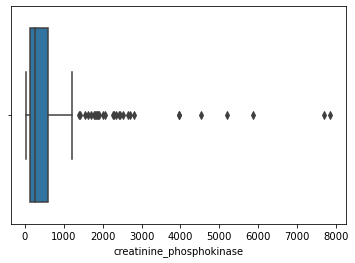

In [23]:
sns.boxplot(df['creatinine_phosphokinase'])

In [24]:
q1=df['creatinine_phosphokinase'].quantile(0.25)

In [25]:
q3=df['creatinine_phosphokinase'].quantile(0.75)

In [26]:
IQR=q3-q1

In [27]:
lower=q1-1.5*IQR

In [28]:
upper=q3+1.5*IQR

In [29]:
df=df[(df['creatinine_phosphokinase']>lower) & (df['creatinine_phosphokinase']<upper)]

In [30]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diabetes'>

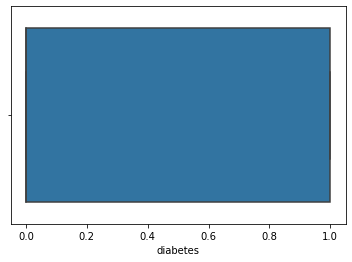

In [31]:
sns.boxplot(df['diabetes'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ejection_fraction'>

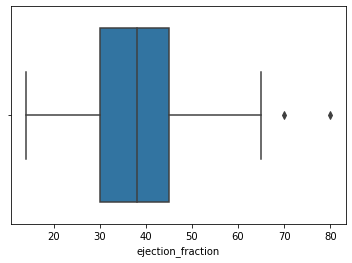

In [32]:
sns.boxplot(df['ejection_fraction'])

In [33]:
q1=df['ejection_fraction'].quantile(0.25)

In [34]:
q3=df['ejection_fraction'].quantile(0.75)

In [35]:
IQR=q3-q1

In [36]:
lower=q1-1.5*IQR

In [37]:
upper=q3+1.5*IQR

In [38]:
df=df[(df['ejection_fraction']>lower) & (df['ejection_fraction']<upper)]

In [39]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='high_blood_pressure'>

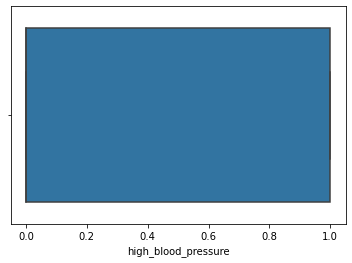

In [40]:
sns.boxplot(df['high_blood_pressure'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='platelets'>

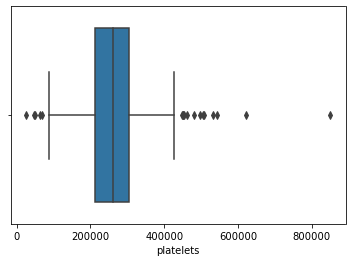

In [41]:
sns.boxplot(df['platelets'])

In [42]:
q1=df['platelets'].quantile(0.25)

In [43]:
q3=df['platelets'].quantile(0.75)

In [44]:
IQR=q3-q1

In [45]:
lower=q1-1.5*IQR

In [46]:
upper=q3+1.5*IQR

In [47]:
df=df[(df['platelets']>lower) & (df['platelets']<upper)]

In [48]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='serum_creatinine'>

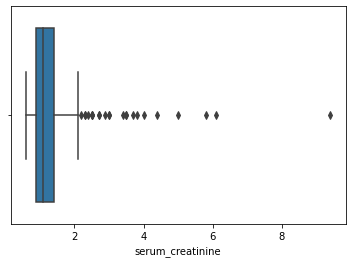

In [49]:
sns.boxplot(df['serum_creatinine'])

In [50]:
q1=df['serum_creatinine'].quantile(0.25)

In [51]:
q3=df['serum_creatinine'].quantile(0.75)

In [52]:
IQR=q3-q1

In [53]:
lower=q1-1.5*IQR

In [54]:
upper=q3+1.5*IQR

In [55]:
df=df[(df['serum_creatinine']>lower) & (df['serum_creatinine']<upper)]

In [56]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='serum_sodium'>

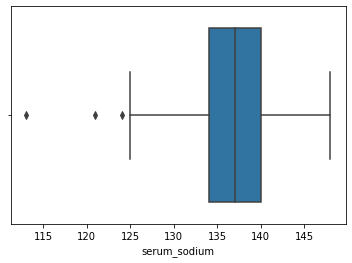

In [57]:
sns.boxplot(df['serum_sodium'])

In [58]:
q1=df['serum_sodium'].quantile(0.25)

In [59]:
q3=df['serum_sodium'].quantile(0.75)

In [60]:
IQR=q3-q1

In [61]:
lower=q1-1.5*IQR

In [62]:
upper=q3+1.5*IQR

In [63]:
df=df[(df['serum_sodium']>lower) & (df['serum_sodium']<upper)]

In [64]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex'>

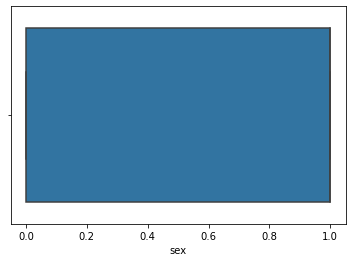

In [65]:
sns.boxplot(df['sex'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking'>

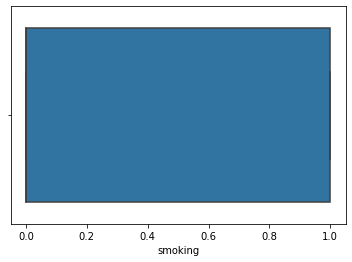

In [66]:
sns.boxplot(df['smoking'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time'>

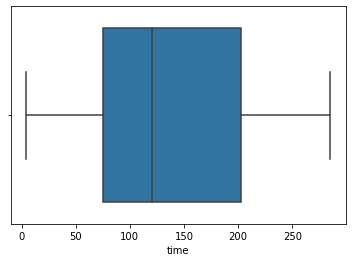

In [67]:
sns.boxplot(df['time'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEATH_EVENT'>

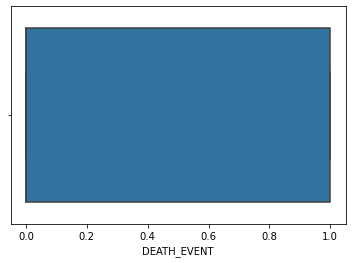

In [68]:
sns.boxplot(df['DEATH_EVENT'])

In [69]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

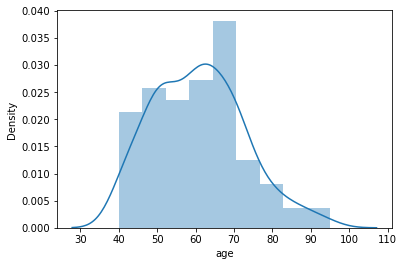

In [70]:
sns.distplot(df['age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Density'>

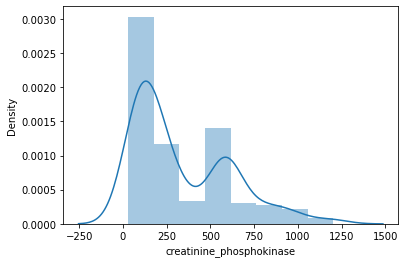

In [71]:
sns.distplot(df['creatinine_phosphokinase'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ejection_fraction', ylabel='Density'>

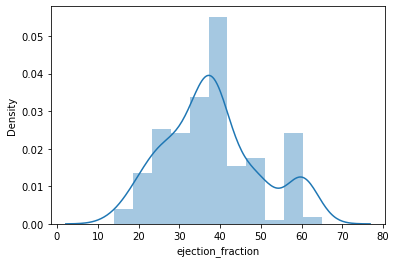

In [72]:
sns.distplot(df['ejection_fraction'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='platelets', ylabel='Density'>

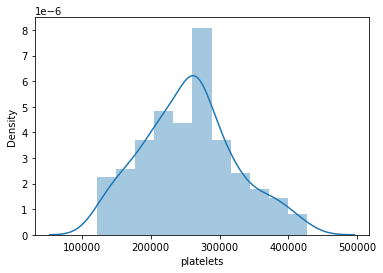

In [73]:
sns.distplot(df['platelets'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='serum_creatinine', ylabel='Density'>

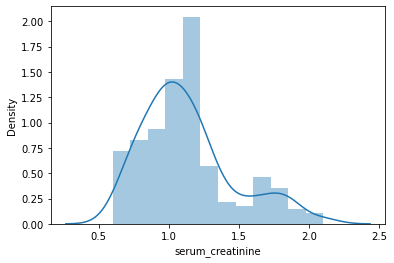

In [74]:
sns.distplot(df['serum_creatinine'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='serum_sodium', ylabel='Density'>

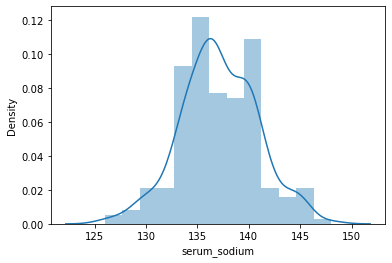

In [75]:
sns.distplot(df['serum_sodium'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time', ylabel='Density'>

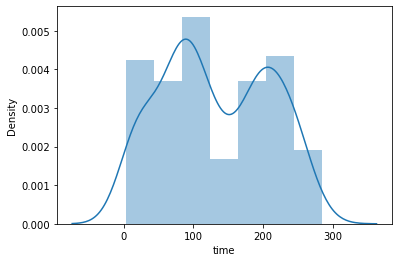

In [76]:
sns.distplot(df['time'])

<AxesSubplot:xlabel='anaemia', ylabel='count'>

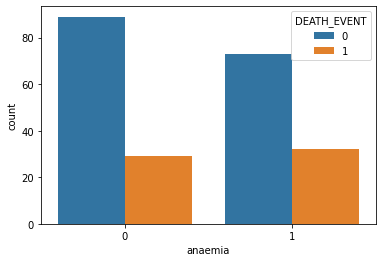

In [77]:
sns.countplot(x=df['anaemia'],hue=df['DEATH_EVENT'])

<AxesSubplot:xlabel='diabetes', ylabel='count'>

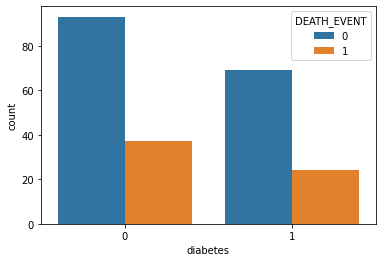

In [78]:
sns.countplot(x=df['diabetes'],hue=df['DEATH_EVENT'])

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

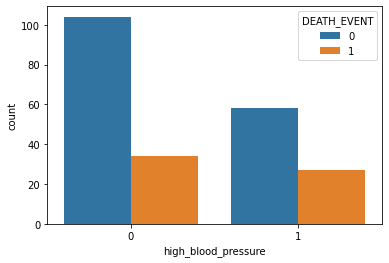

In [79]:
sns.countplot(x=df['high_blood_pressure'],hue=df['DEATH_EVENT'])

<AxesSubplot:xlabel='sex', ylabel='count'>

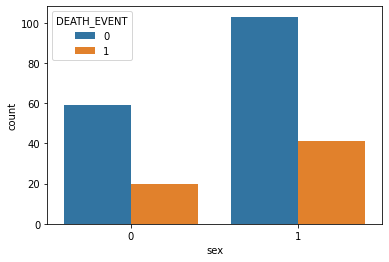

In [80]:
sns.countplot(x=df['sex'],hue=df['DEATH_EVENT'])

<AxesSubplot:xlabel='smoking', ylabel='count'>

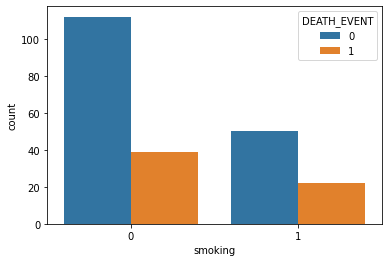

In [81]:
sns.countplot(x=df['smoking'],hue=df['DEATH_EVENT'])

In [82]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


<AxesSubplot:xlabel='age', ylabel='DEATH_EVENT'>

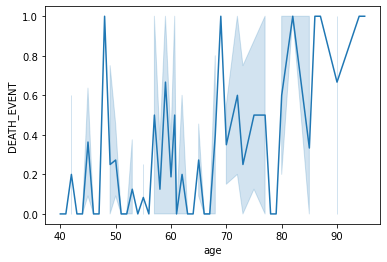

In [212]:
sns.lineplot(x=df['age'],y=df['DEATH_EVENT'])

<AxesSubplot:xlabel='age', ylabel='DEATH_EVENT'>

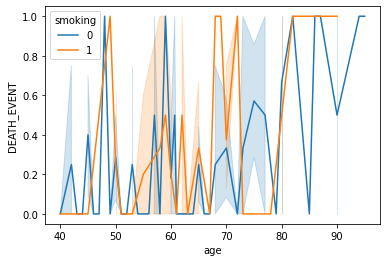

In [213]:
sns.lineplot(x=df['age'],y=df['DEATH_EVENT'],hue=df['smoking'])

In [ ]:
sns.lineplot(x=df['age'],y=df['DEATH_EVENT'],hue=df['smoking'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

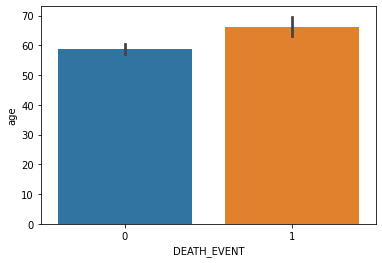

In [83]:
sns.barplot(x=df['DEATH_EVENT'],y=df['age'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

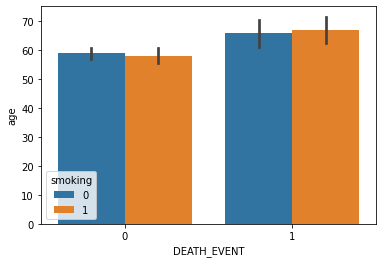

In [84]:
sns.barplot(x=df['DEATH_EVENT'],y=df['age'],hue=df['smoking'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

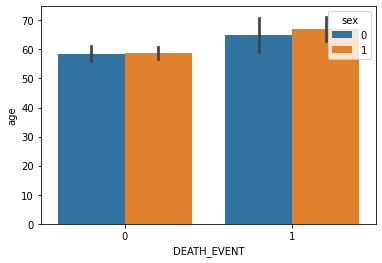

In [85]:
sns.barplot(x=df['DEATH_EVENT'],y=df['age'],hue=df['sex'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

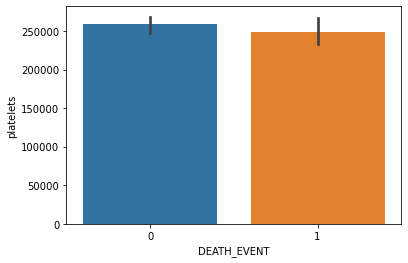

In [86]:
sns.barplot(x=df['DEATH_EVENT'],y=df['platelets'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

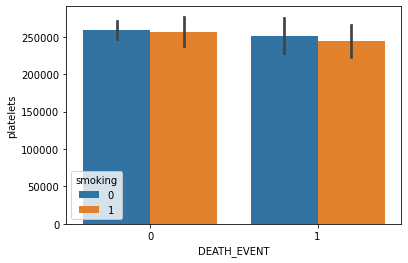

In [87]:
sns.barplot(x=df['DEATH_EVENT'],y=df['platelets'],hue=df['smoking'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

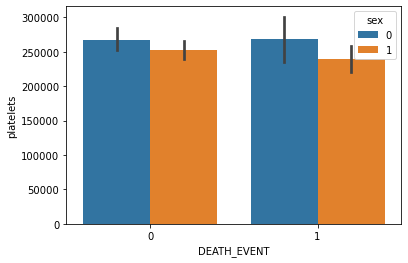

In [88]:
sns.barplot(x=df['DEATH_EVENT'],y=df['platelets'],hue=df['sex'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

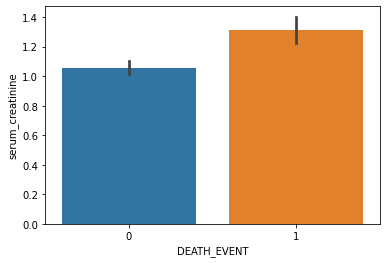

In [89]:
sns.barplot(x=df['DEATH_EVENT'],y=df['serum_creatinine'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

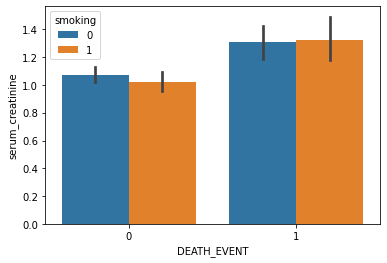

In [90]:
sns.barplot(x=df['DEATH_EVENT'],y=df['serum_creatinine'],hue=df['smoking'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

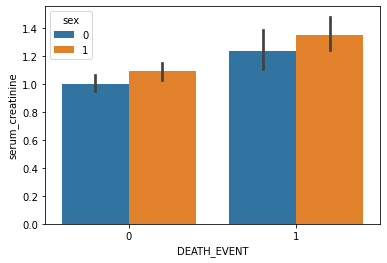

In [91]:
sns.barplot(x=df['DEATH_EVENT'],y=df['serum_creatinine'],hue=df['sex'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_sodium'>

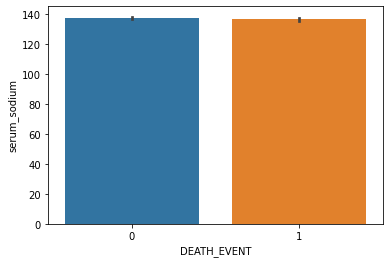

In [92]:
sns.barplot(x=df['DEATH_EVENT'],y=df['serum_sodium'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_sodium'>

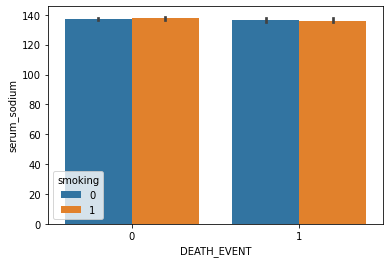

In [93]:
sns.barplot(x=df['DEATH_EVENT'],y=df['serum_sodium'],hue=df['smoking'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_sodium'>

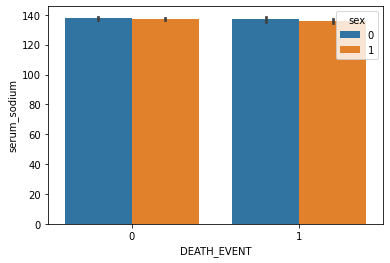

In [94]:
sns.barplot(x=df['DEATH_EVENT'],y=df['serum_sodium'],hue=df['sex'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

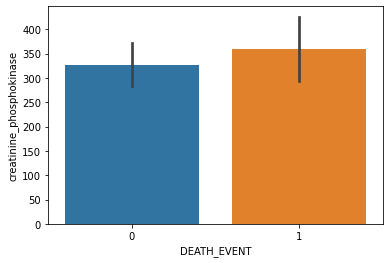

In [95]:

sns.barplot(x=df['DEATH_EVENT'],y=df['creatinine_phosphokinase'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

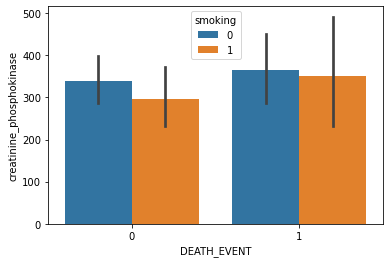

In [96]:

sns.barplot(x=df['DEATH_EVENT'],y=df['creatinine_phosphokinase'],hue=df['smoking'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

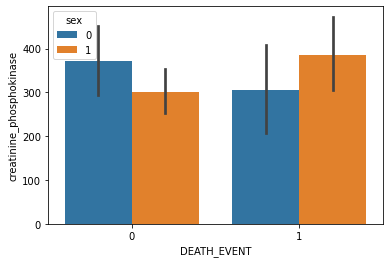

In [97]:

sns.barplot(x=df['DEATH_EVENT'],y=df['creatinine_phosphokinase'],hue=df['sex'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

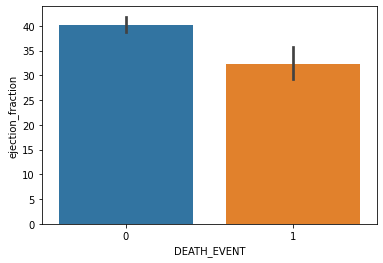

In [98]:
sns.barplot(x=df['DEATH_EVENT'],y=df['ejection_fraction'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

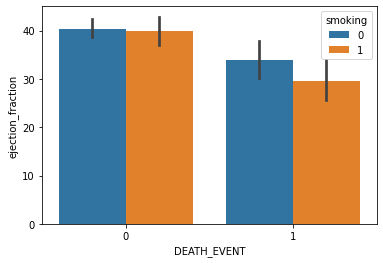

In [99]:
sns.barplot(x=df['DEATH_EVENT'],y=df['ejection_fraction'],hue=df['smoking'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

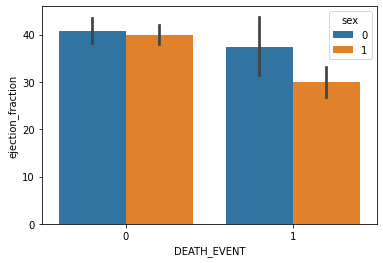

In [100]:
sns.barplot(x=df['DEATH_EVENT'],y=df['ejection_fraction'],hue=df['sex'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='time'>

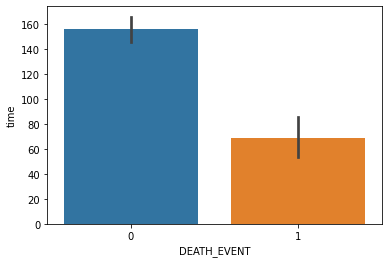

In [101]:
sns.barplot(x=df['DEATH_EVENT'],y=df['time'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='time'>

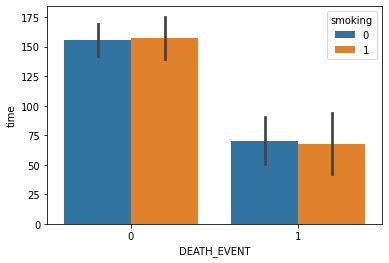

In [102]:
sns.barplot(x=df['DEATH_EVENT'],y=df['time'],hue=df['smoking'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='time'>

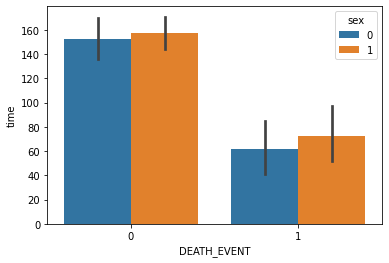

In [103]:
sns.barplot(x=df['DEATH_EVENT'],y=df['time'],hue=df['sex'])

In [104]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

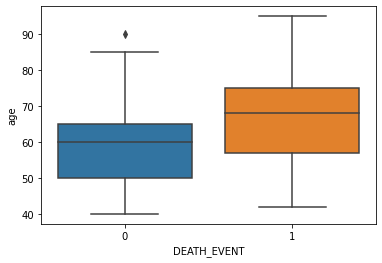

In [105]:
sns.boxplot(x=df['DEATH_EVENT'],y=df['age'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

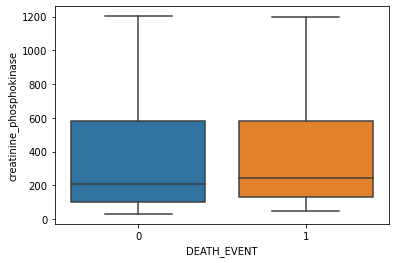

In [106]:
sns.boxplot(x=df['DEATH_EVENT'],y=df['creatinine_phosphokinase'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

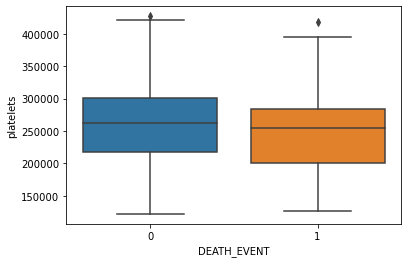

In [107]:
sns.boxplot(x=df['DEATH_EVENT'],y=df['platelets'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

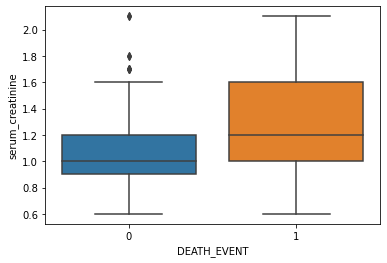

In [108]:
sns.boxplot(x=df['DEATH_EVENT'],y=df['serum_creatinine'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_sodium'>

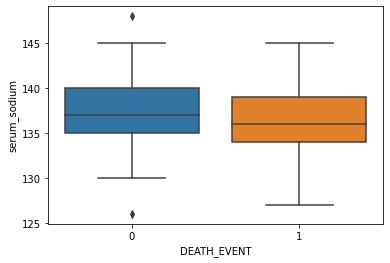

In [109]:

sns.boxplot(x=df['DEATH_EVENT'],y=df['serum_sodium'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='time'>

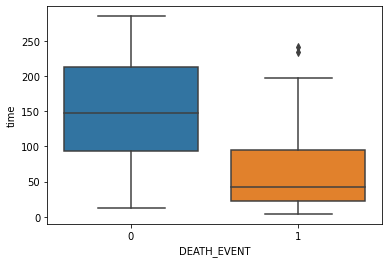

In [110]:
sns.boxplot(x=df['DEATH_EVENT'],y=df['time'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

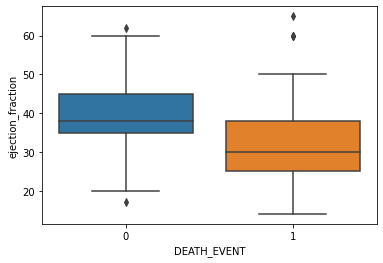

In [111]:
sns.boxplot(x=df['DEATH_EVENT'],y=df['ejection_fraction'])

<AxesSubplot:xlabel='diabetes', ylabel='platelets'>

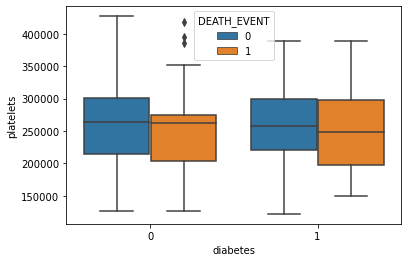

In [112]:
sns.boxplot(x=df['diabetes'],y=df['platelets'],hue=df['DEATH_EVENT'])

<AxesSubplot:xlabel='smoking', ylabel='platelets'>

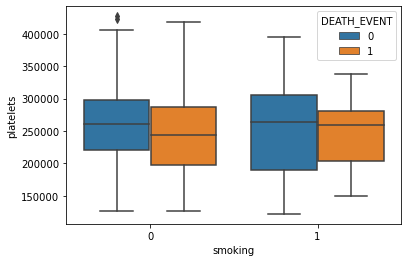

In [113]:
sns.boxplot(x=df['smoking'],y=df['platelets'],hue=df['DEATH_EVENT'])

<AxesSubplot:xlabel='sex', ylabel='platelets'>

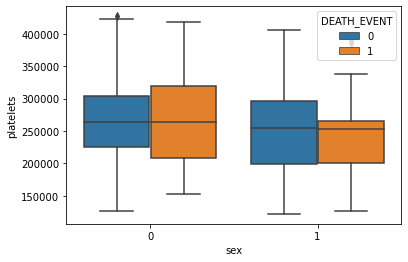

In [114]:
sns.boxplot(x=df['sex'],y=df['platelets'],hue=df['DEATH_EVENT'])

<AxesSubplot:xlabel='anaemia', ylabel='platelets'>

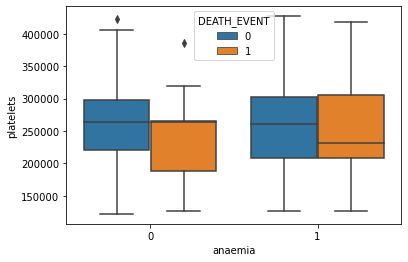

In [115]:
sns.boxplot(x=df['anaemia'],y=df['platelets'],hue=df['DEATH_EVENT'])

<AxesSubplot:xlabel='high_blood_pressure', ylabel='platelets'>

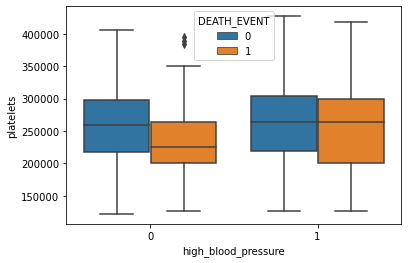

In [116]:
sns.boxplot(x=df['high_blood_pressure'],y=df['platelets'],hue=df['DEATH_EVENT'])

<AxesSubplot:xlabel='high_blood_pressure', ylabel='age'>

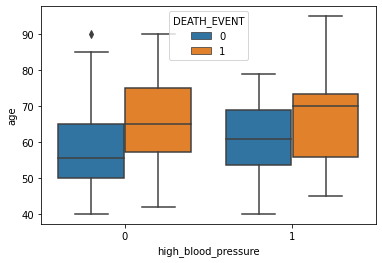

In [117]:
sns.boxplot(x=df['high_blood_pressure'],y=df['age'],hue=df['DEATH_EVENT'])

<AxesSubplot:xlabel='anaemia', ylabel='age'>

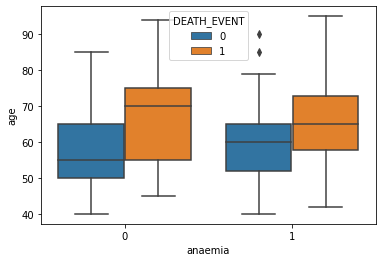

In [118]:
sns.boxplot(x=df['anaemia'],y=df['age'],hue=df['DEATH_EVENT'])

<AxesSubplot:xlabel='sex', ylabel='age'>

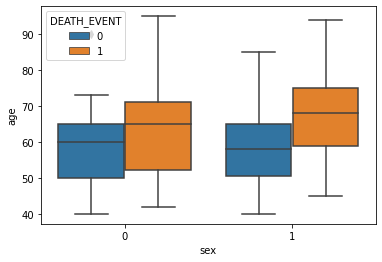

In [119]:
sns.boxplot(x=df['sex'],y=df['age'],hue=df['DEATH_EVENT'])

<AxesSubplot:xlabel='smoking', ylabel='platelets'>

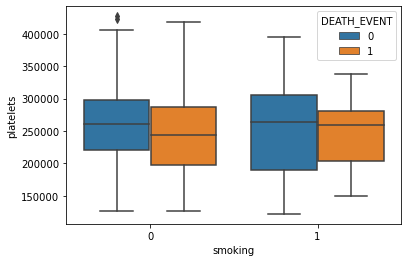

In [120]:
sns.boxplot(x=df['smoking'],y=df['platelets'],hue=df['DEATH_EVENT'])

<AxesSubplot:xlabel='diabetes', ylabel='age'>

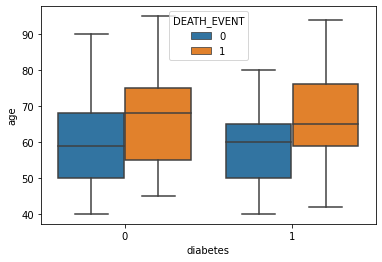

In [121]:
sns.boxplot(x=df['diabetes'],y=df['age'],hue=df['DEATH_EVENT'])

<AxesSubplot:xlabel='smoking', ylabel='age'>

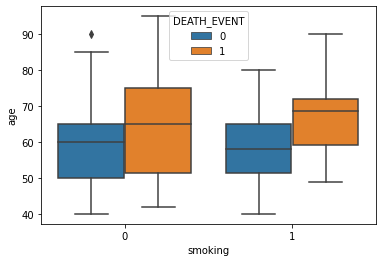

In [122]:
sns.boxplot(x=df['smoking'],y=df['age'],hue=df['DEATH_EVENT'])

In [123]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


<AxesSubplot:>

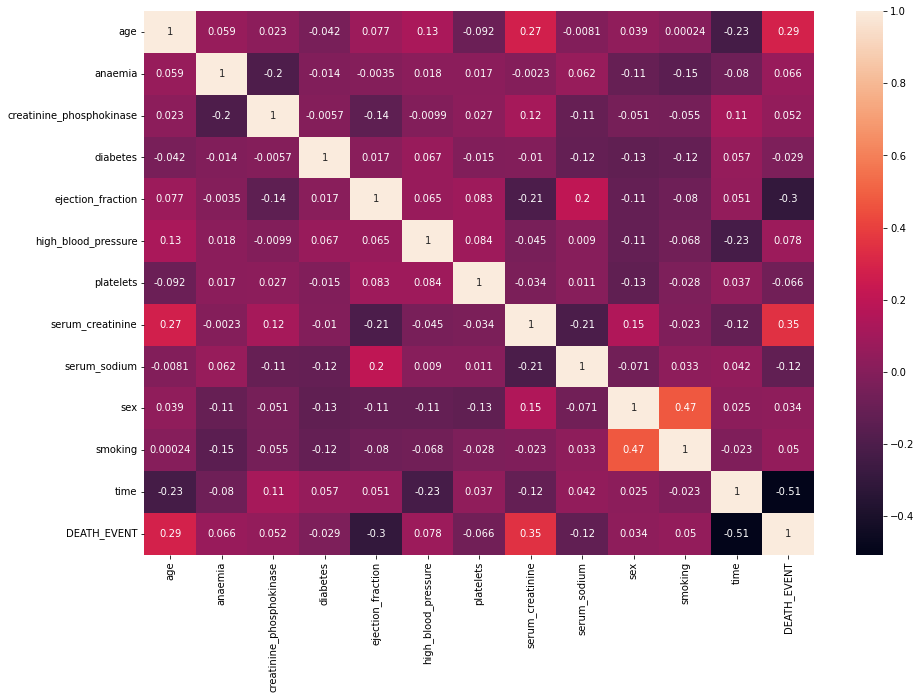

In [124]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

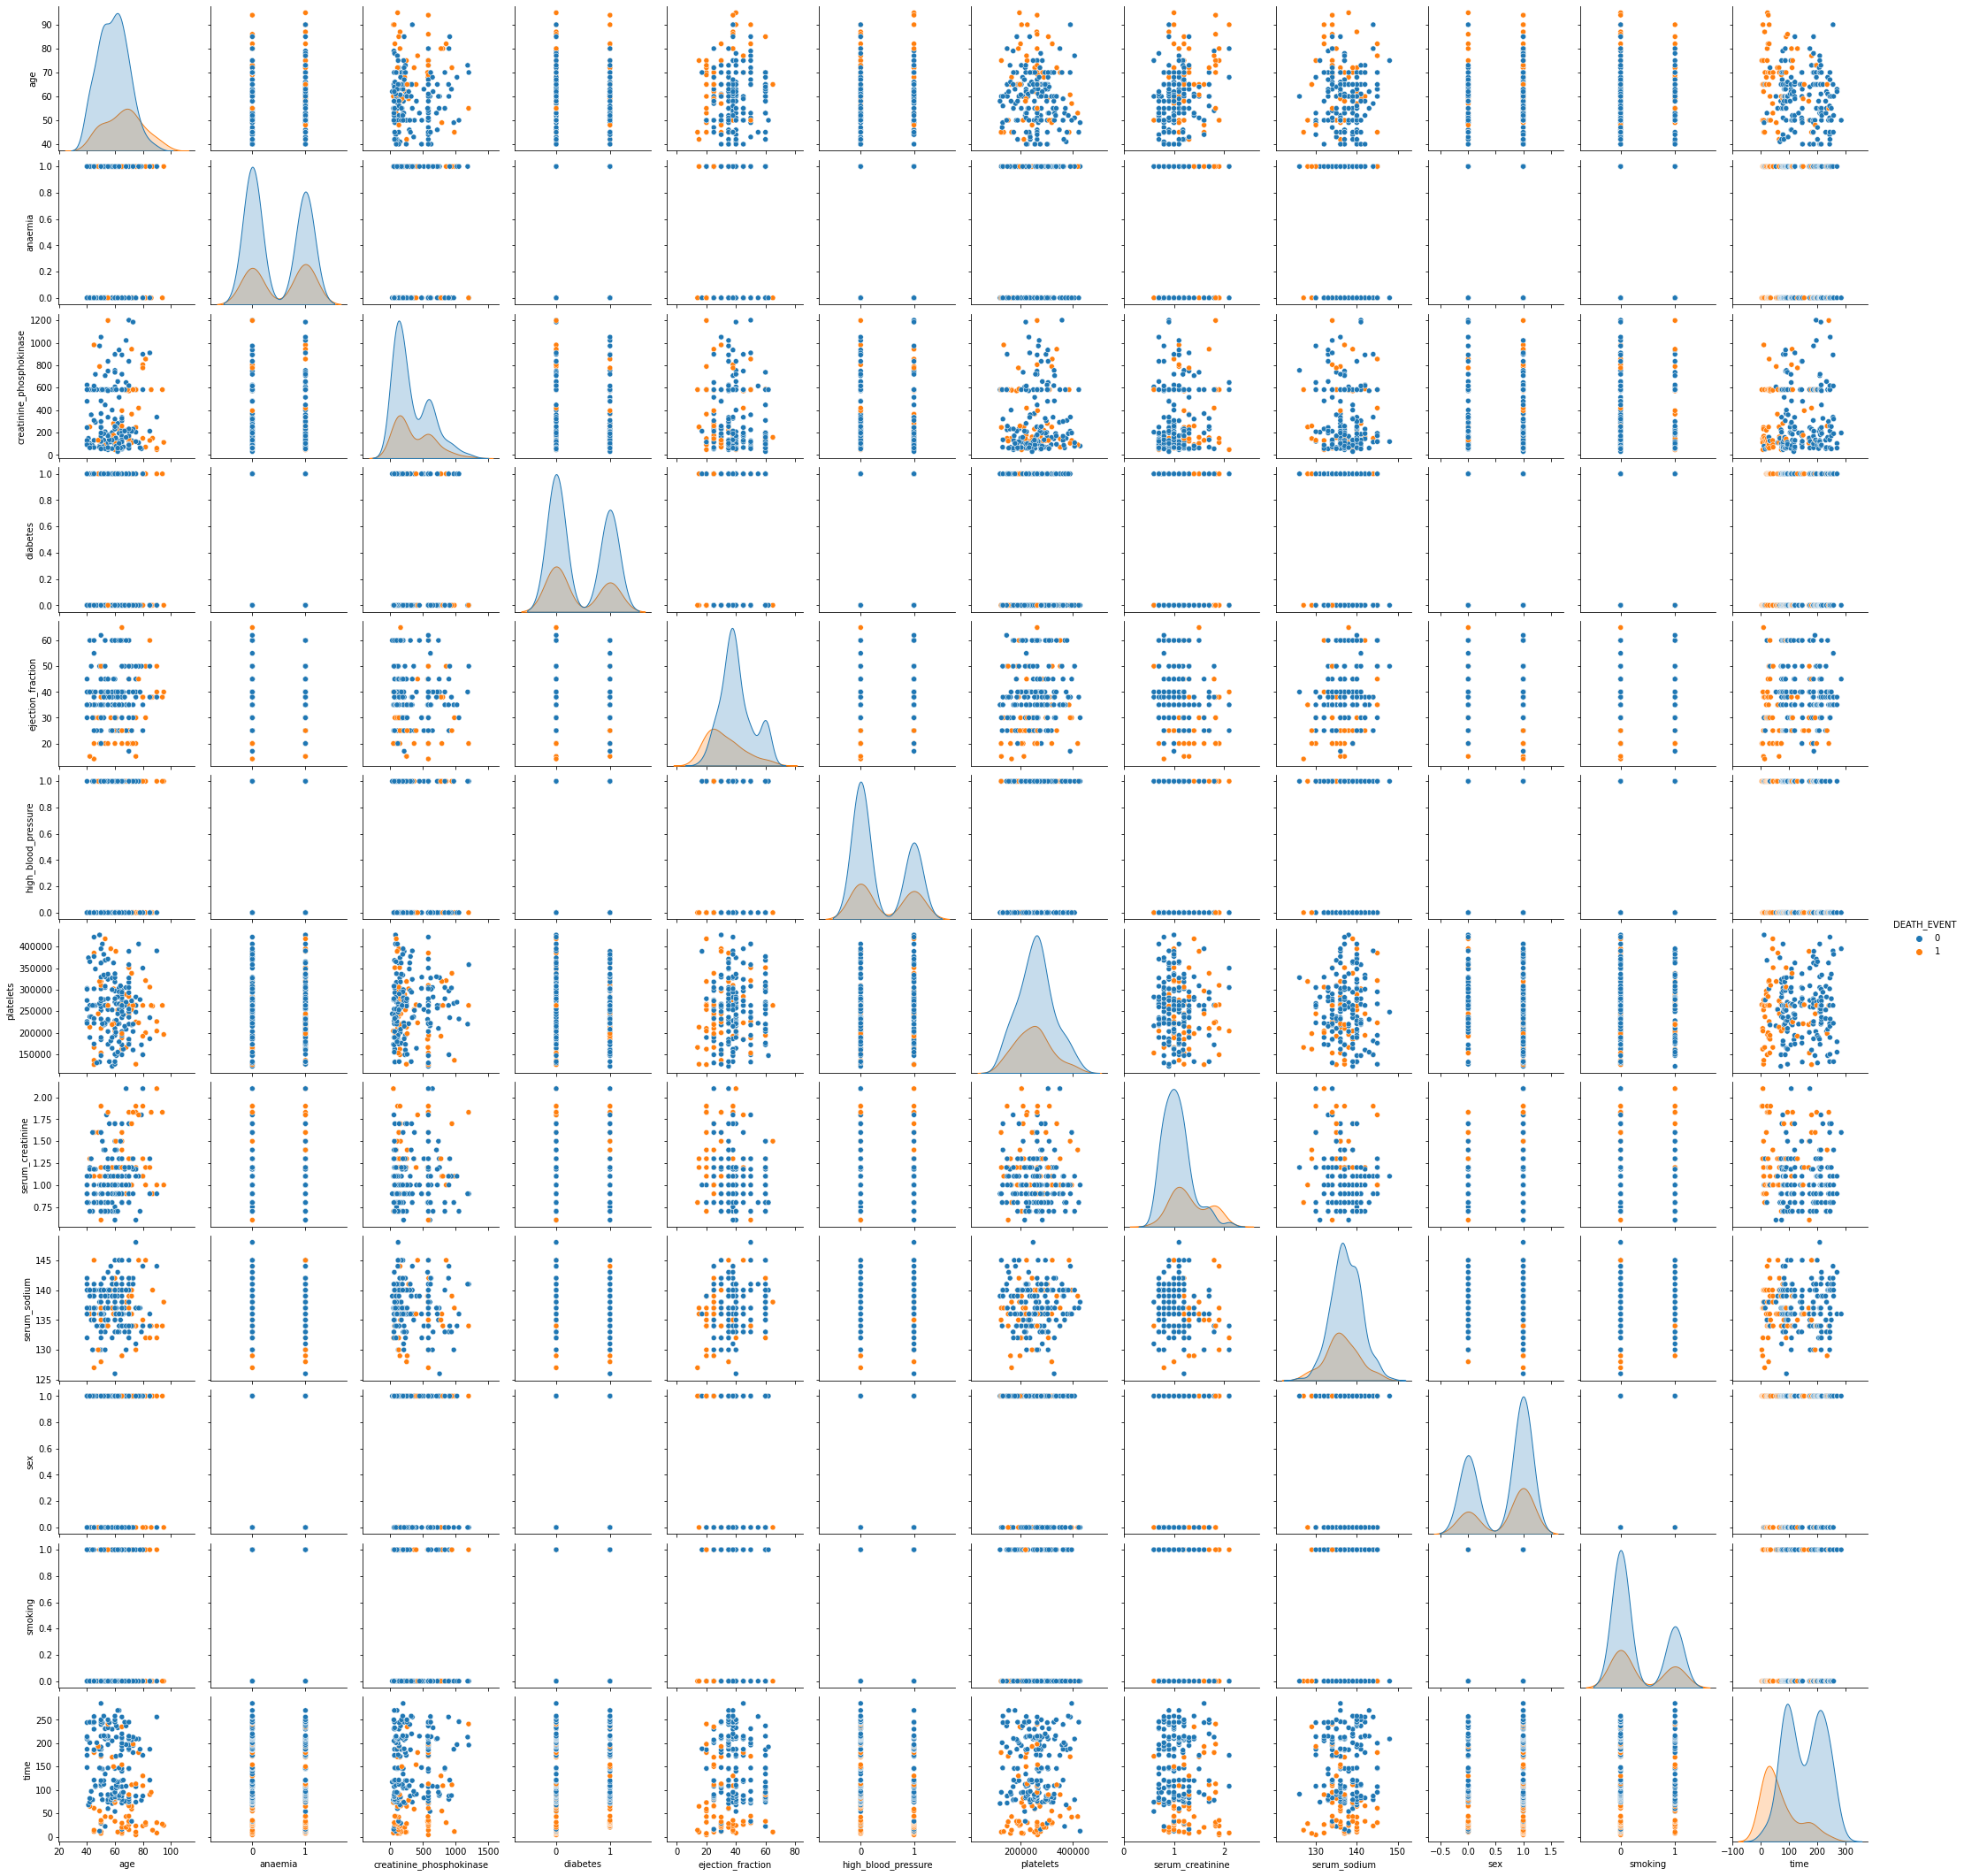

In [125]:
sns.pairplot(data=df,hue='DEATH_EVENT')

In [126]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


In [127]:
df=df.drop('sex',axis=1)


In [128]:
df['DEATH_EVENT'].value_counts()

0    162
1     61
Name: DEATH_EVENT, dtype: int64

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

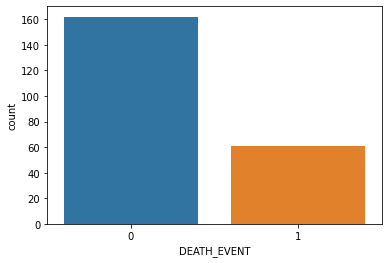

In [129]:
sns.countplot(df['DEATH_EVENT'])

In [130]:
y=df['DEATH_EVENT']

In [131]:
X=df.drop('DEATH_EVENT',axis=1)

In [132]:
from imblearn.over_sampling import SMOTE

In [133]:
smote=SMOTE(sampling_strategy='minority')

In [134]:
X_sm,y_sm=smote.fit_resample(X,y)


In [135]:
y_sm.value_counts()

1    162
0    162
Name: DEATH_EVENT, dtype: int64

# RandomForestClassifier

In [136]:
rfc=RandomForestClassifier()


In [137]:
sc=StandardScaler()


In [138]:
X_sm=sc.fit_transform(X_sm)



In [139]:
X_sm

array([[ 1.01572215, -0.89442719,  0.9582834 , ..., -1.75495797,
        -0.5821022 , -1.45406808],
       [ 0.21136748, -0.89442719, -0.71687154, ..., -2.02611027,
         1.71791138, -1.41403313],
       [-0.99516451,  1.11803399, -0.85134499, ...,  0.14310816,
        -0.5821022 , -1.41403313],
       ...,
       [ 1.55435894, -0.89442719,  1.56917705, ..., -0.67034875,
        -0.5821022 , -0.10622445],
       [-0.99516451, -0.89442719, -0.64387167, ..., -0.39919645,
        -0.5821022 , -0.92026862],
       [-0.03685374,  1.11803399, -0.3211354 , ..., -0.39919645,
        -0.5821022 ,  0.40088504]])

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

In [141]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [142]:
y_pred=rfc.predict(X_train)


In [143]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [144]:
accuracy_score(y_train,y_pred)

1.0

In [145]:
y_pred=rfc.predict(X_test)


In [146]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1],
      dtype=int64)

In [147]:
rfc

RandomForestClassifier()

In [148]:
accuracy_score(y_test,y_pred)

0.8615384615384616

In [149]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

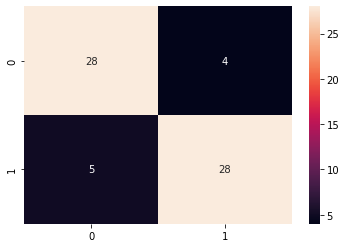

In [150]:
sns.heatmap(data=cm,annot=True,fmt='d')

In [151]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.88      0.85      0.86        33

    accuracy                           0.86        65
   macro avg       0.86      0.86      0.86        65
weighted avg       0.86      0.86      0.86        65



In [152]:
KF=KFold(5)


In [153]:
scores=cross_val_score(rfc,X_test,y_test,cv=KF)


In [154]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.8461538461538461
1 0.8461538461538461
2 0.7692307692307693
3 0.6923076923076923
4 0.6153846153846154


In [155]:
scores.mean()

0.7538461538461539

# LogisticRegression

In [156]:
lr=LogisticRegression()


In [157]:
lr.fit(X_train,y_train)

LogisticRegression()

In [158]:
y_pred=lr.predict(X_train)


In [159]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [160]:
accuracy_score(y_train,y_pred)

0.8687258687258688

In [161]:
y_pred=lr.predict(X_test)


In [162]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [163]:
accuracy_score(y_test,y_pred)

0.7230769230769231

In [164]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

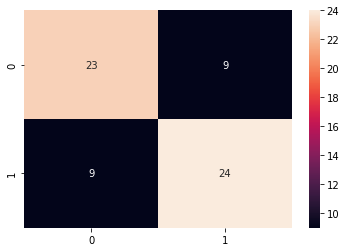

In [165]:
sns.heatmap(data=cm,annot=True,fmt='d')

In [166]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        32
           1       0.73      0.73      0.73        33

    accuracy                           0.72        65
   macro avg       0.72      0.72      0.72        65
weighted avg       0.72      0.72      0.72        65



In [167]:
KF=KFold(5)


In [168]:
scores=cross_val_score(lr,X_test,y_test,cv=KF)


In [169]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.9230769230769231
1 0.6923076923076923
2 0.6923076923076923
3 0.7692307692307693
4 0.6923076923076923


In [170]:
scores.mean()

0.7538461538461538

# KNeighborsClassifier

In [171]:
knc=KNeighborsClassifier()


In [172]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [173]:
y_pred=knc.predict(X_train)


In [174]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [175]:
accuracy_score(y_train,y_pred)

0.8725868725868726

In [176]:
y_pred=knc.predict(X_test)


In [177]:
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [178]:
accuracy_score(y_test,y_pred)

0.7846153846153846

In [179]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

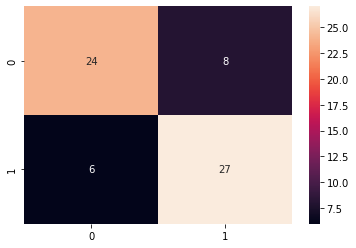

In [180]:
sns.heatmap(data=cm,annot=True,fmt='d')

In [181]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.77      0.82      0.79        33

    accuracy                           0.78        65
   macro avg       0.79      0.78      0.78        65
weighted avg       0.79      0.78      0.78        65



In [182]:
KF=KFold(5)


In [183]:
scores=cross_val_score(knc,X_test,y_test,cv=KF)


In [184]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.6923076923076923
1 0.6923076923076923
2 0.6923076923076923
3 0.6923076923076923
4 0.5384615384615384


In [185]:
scores.mean()

0.6615384615384615

# XGBClassifier

In [186]:
xgb_i=xgb.XGBClassifier()

In [187]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [188]:
y_pred=xgb_i.predict(X_train)


In [189]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [190]:
accuracy_score(y_train,y_pred)

1.0

In [191]:
y_pred=xgb_i.predict(X_test)


In [192]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1])

In [193]:
accuracy_score(y_test,y_pred)

0.8461538461538461

In [194]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

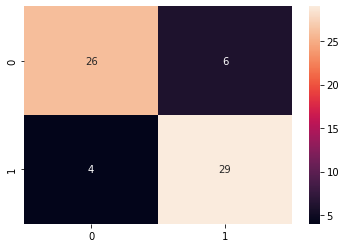

In [195]:
sns.heatmap(data=cm,annot=True,fmt='d')

In [196]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           1       0.83      0.88      0.85        33

    accuracy                           0.85        65
   macro avg       0.85      0.85      0.85        65
weighted avg       0.85      0.85      0.85        65



In [197]:
KF=KFold(5)


In [198]:
scores=cross_val_score(xgb_i,X_test,y_test,cv=KF)


In [199]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.8461538461538461
1 0.7692307692307693
2 0.6923076923076923
3 0.6153846153846154
4 0.6153846153846154


In [200]:
scores.mean()

0.7076923076923076

# ANN

In [201]:
model=keras.Sequential([
    keras.layers.Dense(15,input_shape=(11,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [202]:
model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [203]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
9/9 [==============================] - 0s 2ms/step - loss: 0.8560 - accuracy: 0.5097
Epoch 2/100
9/9 [==============================] - 0s 800us/step - loss: 0.8044 - accuracy: 0.5135
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.7630 - accuracy: 0.5174
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.7292 - accuracy: 0.5444
Epoch 5/100
9/9 [==============================] - 0s 0s/step - loss: 0.6978 - accuracy: 0.5830
Epoch 6/100
9/9 [==============================] - 0s 0s/step - loss: 0.6740 - accuracy: 0.6216
Epoch 7/100
9/9 [==============================] - 0s 0s/step - loss: 0.6552 - accuracy: 0.6602
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.6911
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.6988
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.7143
Epoch 11/100
9/9 [============

In [204]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.5517 - accuracy: 0.7846


[0.5516924262046814, 0.7846153974533081]

In [205]:
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 1ms/step


In [206]:
ypred=[]
for i in y_pred:
    if i>0.5:
        ypred.append(1)
    else:
        ypred.append(0)

In [207]:
ypred[:10]

[0, 1, 0, 1, 0, 0, 0, 0, 1, 1]

In [208]:
y_test[:10]

132    1
108    1
137    0
9      0
180    0
126    0
219    0
196    1
266    1
144    1
Name: DEATH_EVENT, dtype: int64

In [209]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        32
           1       0.79      0.79      0.79        33

    accuracy                           0.78        65
   macro avg       0.78      0.78      0.78        65
weighted avg       0.78      0.78      0.78        65



In [210]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=ypred)

<AxesSubplot:>

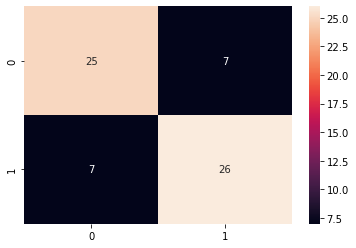

In [211]:
sns.heatmap(cm,fmt='d',annot=True)